In [1]:
import numpy as np
import pandas as pd 
from deconv.figures.common import subplotLabel, getSetup
from deconv.imports import load_tables, infer_x, load_bindingData, infer_x_fixed, ADCC_groups, load_figures
from sklearn.utils import resample

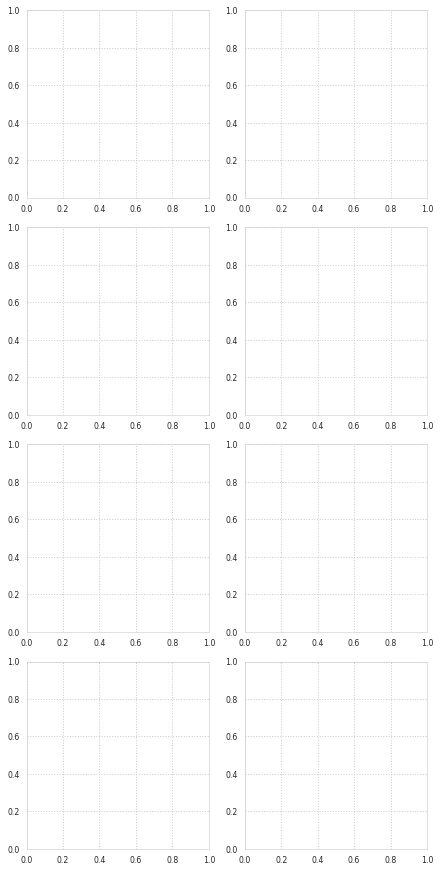

In [2]:
ax, f = getSetup((6, 12), (4, 2))
binding_data = load_bindingData()
A_antiD, _, glycan_list, _ = load_tables()
#setGroup = ADCC_groups()

In [3]:
fig2A = pd.read_csv("./deconv/data/Fig2A.csv", index_col=0)
RI = fig2A.iloc[:, 0]
fig2B = pd.read_csv("./deconv/data/Fig2B.csv", index_col=0)
RIIa_131H = fig2B.iloc[:, 0]
fig2C = pd.read_csv("./deconv/data/Fig2C.csv", index_col=0)
RIIa_131R = fig2C.iloc[:, 0]
fig2D = pd.read_csv("./deconv/data/Fig2D.csv", index_col=0)
RIIb = fig2D.iloc[:, 0]
fig2E = pd.read_csv("./deconv/data/Fig2E.csv", index_col=0)
RIIIa_158F = fig2E.iloc[:, 0]
fig2F = pd.read_csv("./deconv/data/Fig2F.csv", index_col=0)
RIIIa_158V = fig2F.iloc[:, 0]
fig2G = pd.read_csv("./deconv/data/Fig2G.csv", index_col=0)
RIIIb_NA1 = fig2G.iloc[:, 0]
fig2H = pd.read_csv("./deconv/data/Fig2H.csv", index_col=0)
RIIIb_NA2 = fig2H.iloc[:, 0]

In [4]:
binding = [RI, RIIa_131H, RIIa_131R, RIIb, RIIIa_158F, RIIIa_158V, RIIIb_NA1, RIIIb_NA2]

In [5]:
for ii, data in enumerate(binding_data):
        binding_data[ii] = np.nanmean(data, axis=0)
deconv = [infer_x(A_antiD, dd) for dd in binding_data]

In [6]:
glycans = []

num_iters = 100 
for ii in range(8):
    for i in range(num_iters):
        new_bind = resample(binding[ii], n_samples=40, replace=True, stratify=binding[ii].index)
        mean = new_bind.groupby(level=0).sum() / new_bind.groupby(level=0).count()

        glycans.append(infer_x(A_antiD, mean))
        
    new_glycans = np.array(glycans)
    error = (deconv[ii] - np.quantile(new_glycans, 0.33, axis=0), np.quantile(new_glycans, 0.67, axis=0) - deconv[ii])

    ax[ii].bar(glycan_list, deconv[ii], yerr=error, color='C0')
    ax[ii].set_xlabel("Glycans")
    ax[ii].set_ylabel("Receptor Binding")
    ax[ii].set_xticklabels(glycan_list, rotation=90)

    glycans = []

<ipython-input-6-364d93cef7cb>:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[ii].set_xticklabels(glycan_list, rotation=90)
<ipython-input-6-364d93cef7cb>:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[ii].set_xticklabels(glycan_list, rotation=90)
<ipython-input-6-364d93cef7cb>:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[ii].set_xticklabels(glycan_list, rotation=90)
<ipython-input-6-364d93cef7cb>:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[ii].set_xticklabels(glycan_list, rotation=90)
<ipython-input-6-364d93cef7cb>:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[ii].set_xticklabels(glycan_list, rotation=90)
<ipython-input-6-364d93cef7cb>:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[ii].set_xticklabels(glycan_list, rotation=90)
<ipython-input-6-364d93cef7cb>:17:

In [7]:
ax[0].set_title("FcgRI")
ax[1].set_title("FcgRIIa-131H")
ax[2].set_title("FcgRIIa-131R")
ax[3].set_title("FcgRIIb")
ax[4].set_title("FcgRIIIa-158F")
ax[5].set_title("FcgRIIIa-158V")
ax[6].set_title("FcgRIIIb-NA1")
ax[7].set_title("FcgRIIIb-NA2")

subplotLabel(ax)

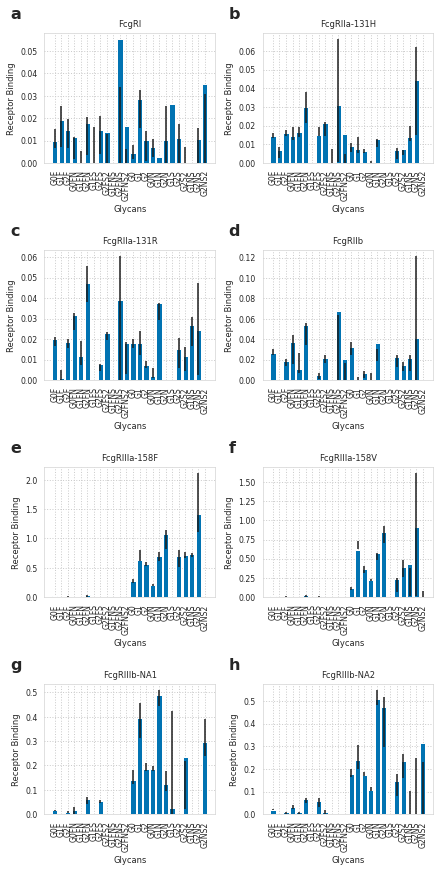

In [8]:
f